In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

plt.rcParams.update({"font.family": "Helvetica"})



In [2]:
# https://euclidconsortium.slack.com/archives/C082ESP5Q9G/p1739820007133379

# Rough numbers (grade A or B, predominantly galaxy-galaxy)
# HSC (1300 deg2): 1055, References: SuGOHI+HOLISMOKES
# DESI (19k deg2): 1222, References Storfer+24, Huang+21, +20
# HST (follow-up): 51+ see thread (Huang+25)
# UNIONS (4.9k deg2): 133+56, Reference Savary+22, Acevedo Barroso+24
# DES (5.2k deg2): 511+186+147, Reference Jacobs+19, Rojas+22, Gonzales+25
# PanSTARRS (30k deg2): 330, Reference Canameras+20
# Euclid (50 deg2): ~550,


from collections import namedtuple

Survey = namedtuple('Survey', ['name', 'area', 'lenses'])

dr1_area = 1900
ews_area = 14000
euclid_lenses_per_deg2 = 550 / 50

hsc_lens_per_deg2 = 1055 / 1300
rubin_area = 18000
# https://www.lsst.org/scientists/survey-design
# https://arxiv.org/pdf/2406.08919 which more or less repeats
# https://arxiv.org/pdf/1507.02657

surveys = [
    Survey('HSC', 1300, 1055),
    # Survey('Rubin 10Y', rubin_area, rubin_area * hsc_lens_per_deg2),
    # Survey('HSC/Rubin', rubin_area, rubin_area * hsc_lens_per_deg2),
    # Survey('Rubin (est.)', rubin_area, 120000),
    Survey('DESI-LS', 19000, 1222),
    Survey('KiDS', 1350, 268),
    # Survey('HST', 1, 51),
    Survey('HST COSMOS', 1.6, 67),
    Survey('JWST COSMOS-Web', 0.54, 150),
    Survey('CFHTLS', 150, 330),
    Survey('UNIONS', 4900, 133+56),
    Survey('DES', 5200, 511+186+147),
    Survey('PanSTARRS', 30000, 330),
    # Survey('Euclid ELSE', 0.7, 16),
    Survey('Euclid Q1', 50, 550),
    Survey('Euclid Wide\n Survey', ews_area, ews_area * euclid_lenses_per_deg2),
    Survey('Euclid DR1', dr1_area, dr1_area * euclid_lenses_per_deg2)
]
df = pd.DataFrame(surveys)
df['lenses_per_deg2'] = df.lenses / df.area



# insert row
# dr1 = pd.Series({'name': 'DR1', 'area': dr1_area, 'lenses': dr1_area * euclid_lenses_per_deg2, 'lenses_per_deg2': euclid_lenses_per_deg2})
# ews = pd.Series({'name': 'Euclid EWS', '/area': ews_area, 'lenses': ews_area * euclid_lenses_per_deg2, 'lenses_per_deg2': euclid_lenses_per_deg2})

# df = pd.concat([df, dr1, ews], axis=0)

df

,name,area,lenses,lenses_per_deg2
0,HSC,1300.00,1055.0,0.811538
1,DESI-LS,19000.00,1222.0,0.064316
2,KiDS,1350.00,268.0,0.198519
3,HST COSMOS,1.60,67.0,41.875000
4,JWST COSMOS-Web,0.54,150.0,277.777778
5,CFHTLS,150.00,330.0,2.200000
6,UNIONS,4900.00,189.0,0.038571
7,DES,5200.00,844.0,0.162308
8,PanSTARRS,30000.00,330.0,0.011000
9,Euclid Q1,50.00,550.0,11.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'H

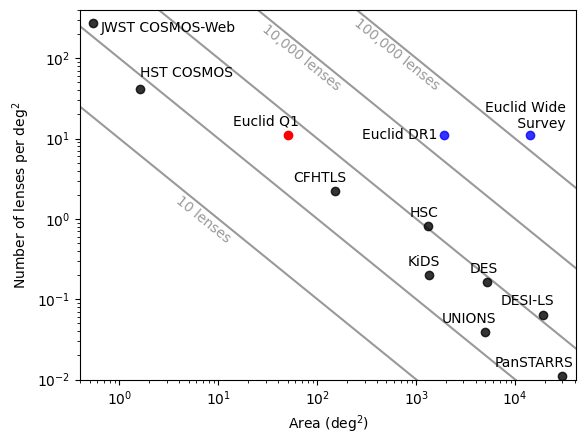

In [3]:
#import niceplots.utils as nicepl

#nicepl.initPlot()
fw, fh = plt.rcParams['figure.figsize'] # Get figure width and height
plt.rcParams.update({'font.size': 10})  # Change 14 to your desired font size

fig, ax = plt.subplots(figsize=(fw, fh))

for i, row in df.iterrows():
    if row['name'] == 'Euclid Q1':
        color = 'r'
        alpha = 1
    elif row['name'] == 'Euclid DR1' or row['name'] == 'Euclid Wide\n Survey':
        color = 'b'
        alpha = .8
    elif row['name'] == 'HSC/Rubin' or row['name'] == 'Rubin (est.)':
        color = 'g'
        alpha = .8
    else:
        color = 'k'
        alpha = .8
    ax.scatter(row.area, row.lenses_per_deg2, label=row['name'], color=color, alpha=alpha)
# for survey in surveys:
#     ax.scatter(survey.area, survey.lenses, label=survey.name)
#     ax.text(survey.area, survey.lenses, survey.name)

# ax.scatter(df.area, df.lenses)
# ax.scatter(df.area, df.lenses_per_deg2)


for i, row in df.iterrows():
    # if row['name'] == 'UNIONS':
    #     x_mod = 1.4
    #     y_mod = 1.0
    # elif row['name'] == 'Euclid DR1':
    #     x_mod = 1.
    #     y_mod = 1.6
    # elif row['name'] == 'Euclid Wide':
    #     x_mod = 1.6
    #     y_mod = 1.
    # elif row['name'] == 'Rubin (est.)':
    #     x_mod = 1.6
    #     y_mod = 1.
    # elif row['name'] == 'HSC/Rubin':
    #     x_mod = 1.6
    #     y_mod = 1.

    if row['name'] == 'HST COSMOS':
        x_mod = 1.
        y_mod = 1.3
        ax.text(row.area * x_mod, row.lenses_per_deg2 * y_mod, row['name'], horizontalalignment='left', verticalalignment='bottom')
    elif row['name'] == 'Euclid Wide\n Survey':
        x_mod = 2.3
        y_mod = 1.05
        ax.text(row.area * x_mod, row.lenses_per_deg2 ** y_mod, row['name'], horizontalalignment='right', verticalalignment='bottom')
    elif row['name'] == 'Euclid DR1':
        # x_mod = 1.6
        # y_mod = 1.
        ax.text(row.area ** .98, row.lenses_per_deg2 * 1., row['name'], horizontalalignment='right', verticalalignment='center')
    elif row['name'] == 'JWST COSMOS-Web':
        x_mod = 1.2
        y_mod = 0.7
        ax.text(row.area * x_mod, row.lenses_per_deg2 * y_mod, row['name'], horizontalalignment='left', verticalalignment='bottom')
    else:
        x_mod = 1.3
        y_mod = 1.2
        ax.text(row.area * x_mod, row.lenses_per_deg2 * y_mod, row['name'], horizontalalignment='right', verticalalignment='bottom')

# ax.text(0.3,  9, '10 lenses', alpha=.3, rotation=-53, horizontalalignment='left', verticalalignment='bottom')
# ax.text(10**4.5,  0.4, '100,000 lenses', alpha=.3, rotation=-53, horizontalalignment='left', verticalalignment='bottom')
# ax.text(10**4.3,  0.065, '10,000 lenses', alpha=.3, rotation=-53, horizontalalignment='left', verticalalignment='bottom')

ax.text(7,  0.5, '10 lenses', alpha=.4, rotation=-39, horizontalalignment='center', verticalalignment='baseline')
ax.text(10**2.8,  10**1.6, '100,000 lenses', alpha=.4, rotation=-39, horizontalalignment='center', verticalalignment='baseline')
ax.text(10**1.84,  10**1.6, '10,000 lenses', alpha=.4, rotation=-39, horizontalalignment='center', verticalalignment='baseline')

lower_lim = -4
for log_lenses in [5, 6, 7, 8, 9]:
    area_contours = np.logspace(lower_lim, log_lenses, 100)
    lens_per_deg_contours = np.logspace(log_lenses, lower_lim, 100)
    # total_lens_contours = area_contours * lens_per_deg_contours  # all equal
    ax.plot(area_contours, lens_per_deg_contours, color='k', linestyle='-', alpha=.4)
    # ax.text(area_contours[-1], lens_per_deg_contours[-1], f'{lens_per_deg_contours[-1]:.0f}', color='k')

# ax.set_xlim(10**-1., 10**6)
ax.set_xlim(0.4, 41253)
ax.set_ylim(10**-2., 4*10**2)
ax.set_xlabel('Area (deg$^2)$')
# ax.set_ylabel('Number of lenses')
ax.set_ylabel('Number of lenses per deg$^2$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axvline(41000)
fig.savefig('lens_surveys.pdf', dpi=300, format='pdf')



In [4]:
area_contours * lens_per_deg_contours

array([100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 1000

In [5]:
lens_per_deg_contours

array([1.00000000e+09, 7.39072203e+08, 5.46227722e+08, 4.03701726e+08,
       2.98364724e+08, 2.20513074e+08, 1.62975083e+08, 1.20450354e+08,
       8.90215085e+07, 6.57933225e+07, 4.86260158e+07, 3.59381366e+07,
       2.65608778e+07, 1.96304065e+07, 1.45082878e+07, 1.07226722e+07,
       7.92482898e+06, 5.85702082e+06, 4.32876128e+06, 3.19926714e+06,
       2.36448941e+06, 1.74752840e+06, 1.29154967e+06, 9.54548457e+05,
       7.05480231e+05, 5.21400829e+05, 3.85352859e+05, 2.84803587e+05,
       2.10490414e+05, 1.55567614e+05, 1.14975700e+05, 8.49753436e+04,
       6.28029144e+04, 4.64158883e+04, 3.43046929e+04, 2.53536449e+04,
       1.87381742e+04, 1.38488637e+04, 1.02353102e+04, 7.56463328e+03,
       5.59081018e+03, 4.13201240e+03, 3.05385551e+03, 2.25701972e+03,
       1.66810054e+03, 1.23284674e+03, 9.11162756e+02, 6.73415066e+02,
       4.97702356e+02, 3.67837977e+02, 2.71858824e+02, 2.00923300e+02,
       1.48496826e+02, 1.09749877e+02, 8.11130831e+01, 5.99484250e+01,
      